In [2]:
import os
import estimator
from qiskit_aer import Aer, AerSimulator

import Ramsey_ExperimentV2
import random
import importlib
from tqdm import tqdm
ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch

In [34]:
import numpy as np
import math
n = 3
total_shots = 10000
T = np.pi
measurements = 40
delay = np.linspace(0, T, measurements)

W = [random.gauss(0, 3) for _ in range(n)]
# L = [random.gauss(1, 1) for _ in range(n)]
L = [np.abs(w*0) for w in W]
J = [random.gauss(0, 0) for _ in range(n - 1)]

# L =  [0.8730355090716002, 1.433526482334413, 0.3905186270259645]
J = [0.5,-0.7]
W = [-1.2471935843880004, 2.047894974763447, 0.5578837528942351]


delay_single = [1]
batch_x, batch_y = ramsey_experiment.ramsey_global(n,total_shots,delay,L,W,J)
rot = 0.23
# batch_x_rot, batch_y_rot = ramsey_experiment.ramsey_global_with_rot(n,total_shots,delay,L,W,J, rot)
batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = ramsey_experiment.ramsey_local(n,total_shots,delay,L,W,J)
batch_x_det2, batch_y_det2, batch_x_cross2, batch_y_cross2 = ramsey_experiment.ramsey_local(n,total_shots,delay_single,L,W,J)


In [28]:
ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch
estimator = importlib.reload(estimator)

## qubit by qubit


In [35]:

guessed_decay,guessed_W,guessed_J = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)

guessed decay:  [-0.006621497525339343, 0.007648778293520283, -0.0017059010252133669]
real decay:  [0.0, 0.0, 0.0]
guessed frequency:  [-1.246242282753536, 2.043663632773164, 0.5698416799863253]
real frequency:  [-1.2471935843880004, 2.047894974763447, 0.5578837528942351]
guessed J:  [0.4985290711819643, -0.7021742948736307]
real J:  [0.5, -0.7]
error:  0.005851822121493049
error in percent:  0.9264760240293426


In [36]:

guessed_decay,guessed_W,guessed_J = estimator.one_by_one_fit(batch_x_det2, batch_y_det2, batch_x_cross2, batch_y_cross2)
print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)

guessed decay:  [0.003961250146019521, -0.009063592655549816, -0.005813432638834168]
real decay:  [0.0, 0.0, 0.0]
guessed frequency:  [-1.2241525415765324, 2.067422397168135, 0.5648381687193025]
real frequency:  [-1.2471935843880004, 2.047894974763447, 0.5578837528942351]
guessed J:  [0.4693513930248795, -0.6811520380619815]
real J:  [0.5, -0.7]
error:  0.017272784848580025
error in percent:  2.734673183528636


C:\Projects\Crosstalk\estimator.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess)


## global

In [37]:
neighbors = 1
guessed_decay,guessed_W,guessed_J = estimator.full_complex_fit(batch_x, batch_y, neighbors=neighbors)

print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,J])

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)

guessed decay:  [8.27350064e-03 2.39052941e-13 7.38853390e-03]
real decay:  [0.0, 0.0, 0.0]
guessed frequency:  [-0.78333366  1.82456804 -0.12248087]
real frequency:  [-1.2471935843880004, 2.047894974763447, 0.5578837528942351]
guessed J:  [-0.43599736  0.65359312]
real J:  [0.5, -0.7]
error:  0.6553973436593907
error in percent:  103.76424855477661


In [38]:
import Symbolic.symbolic_evolution as symbolic_evolution
importlib.reload(symbolic_evolution)
symbolic_exp = symbolic_evolution.get_expectation_values_exp(n, neighbors=0)


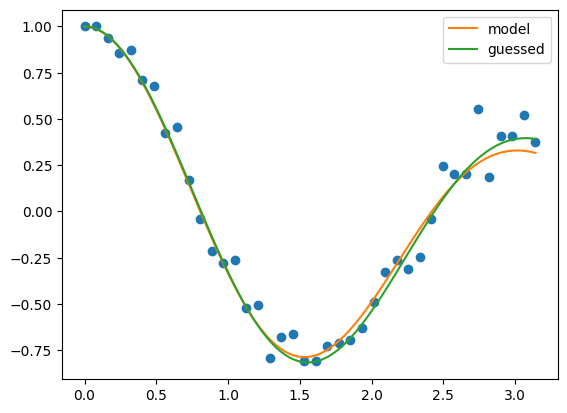

In [39]:
#plot <x> points:
k = 1
import matplotlib.pyplot as plt
#plug into symbolic_exp[0] the guessed parameters
time = np.linspace(0, T, 100)
X_model = [symbolic_evolution.set_parameters(symbolic_exp[n-k-1],W,J,L,t) for t in time]
X_guessed = [symbolic_evolution.set_parameters(symbolic_exp[n-k-1],guessed_W,guessed_J,guessed_decay,t) for t in time]

plt.plot(delay, batch_x.zi_formated[k], 'o')
plt.plot(time, X_model,  label="model")
plt.plot(time, X_guessed, label="guessed")
plt.legend()


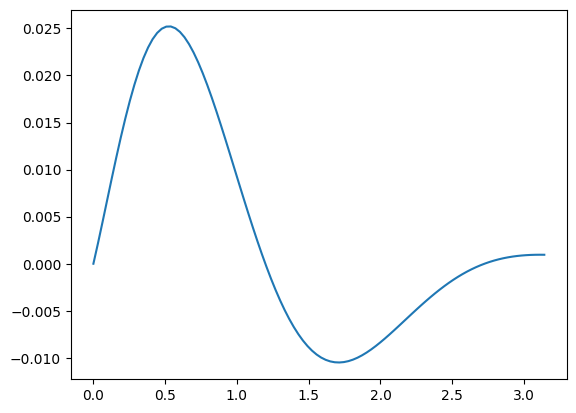

In [423]:
difference = np.array(X_model)-np.array(X_guessed)
plt.plot(time, difference)

In [42]:
import matplotlib.pyplot as plt

data = []
for i in range(len(delay)):
    data.append(batch_x.RamseyExperiments[i].get_n_nearest_neighbors(neighbors))
    data.append(batch_y.RamseyExperiments[i].get_n_nearest_neighbors(neighbors))
data = np.concatenate(data)

model = []
guessed = []
for t in delay:
    for i in range(2*(n+n-1)):
        model.append(symbolic_evolution.set_parameters(symbolic_exp[i],W,J,L,t))
        guessed.append(symbolic_evolution.set_parameters(symbolic_exp[i], guessed_W, guessed_J, guessed_decay,t))


# plt.plot(data, model_func(delay,guessed_decay,guessed_W,guessed_J), 'o')
plt.plot(data, model, 'o', label="model")
plt.plot(data, guessed, 'o', label="guessed")
plt.plot(np.linspace(-0.5,0.5,40), np.linspace(-0.5,0.5,40), 'r')
plt.grid()
plt.legend()
# print(z_points - model_func(delay,L,W,J))

KeyboardInterrupt: 

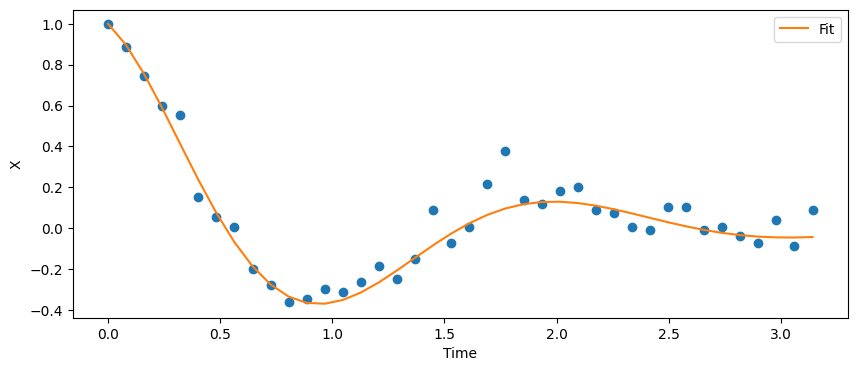

In [4]:
import numpy as np
import matplotlib.pyplot as plt

correct_z = lambda  t, w, a : (np.cos(w * t)) * np.exp(-a * t)
z_p = batch_x.zi_formated[0]

# Plotting
plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.plot(delay, z_p, 'o')
plt.plot(delay, correct_z(delay, W[0], L[0]), label="Fit")

# Remove axes
# plt.axis('off')
plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.show()
